<a href="https://colab.research.google.com/github/kevindmzapata/deep-learning-project/blob/main/01_exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Exploración de los Datos

## I. Librerias necesarias

In [1]:
!wget -nc --no-cache -O database.zip -q https://raw.githubusercontent.com/kevindmzapata/deep-learning-project/main/database.zip
!unzip -n -q database.zip
!rm database.zip

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
spacing = {
  "single_ch":    [14.3, 15.3, 16.3, 17.8, 19.3, 21.3, 23.3, 26.3, 28.3, 31.3, 36.3],
  "18GHz":        [18, 19, 20, 23, 25, 27, 30, 32, 35, 40],
  "17.6GHz":      [18, 19, 20, 21.5, 23, 25, 27, 30, 32, 35, 40],
  "17GHz":        [18, 19, 20, 21.5, 23, 25, 27, 30, 32, 35, 40],
  "16.5GHz":      [18, 19, 20, 21.5, 23, 25, 27, 30, 32, 35, 40],
  "16GHz":        [18, 19, 20, 21.5, 23, 25, 27, 30, 32, 35, 40],
  "15.5GHz":      [20, 21.5, 23, 25, 27, 30, 32, 35, 40],
  "15GHz":        [23, 25, 27, 30, 32, 35, 40],
}

## II. Cargar imágenes

In [4]:
directory = "database"
X = []

for key, value in spacing.items():
  for osnr in value:
    for i in range(9):
      path = f"{directory}/{key}/{osnr}_dB_sample_{i}.png"

      # Get image
      img = plt.imread(path)
      X.append(img)

X = np.array(X)

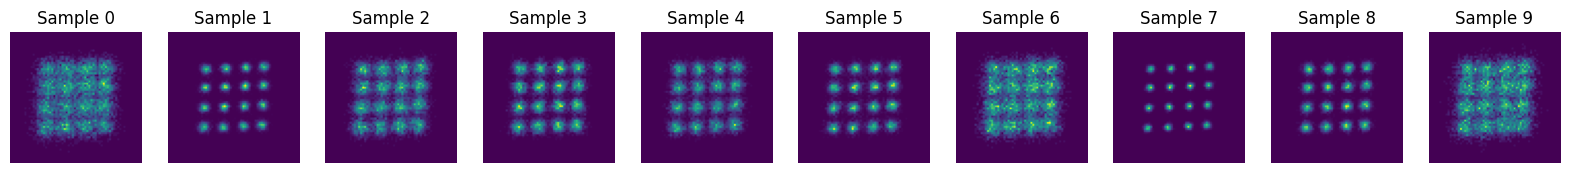

In [5]:
X_sample = np.random.permutation(X)[:10]

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.set_title(f"Sample {i}")
    ax.imshow(X_sample[i])
    ax.axis("off")
plt.show()

In [6]:
X.shape

(729, 64, 64)

In [7]:
X_reshaped = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
X_reshaped.shape

(729, 4096)

In [8]:
X_reshaped[:, 1000].mean(), X_reshaped[:, 1000].std()

(0.12769037, 0.12896356)

In [9]:
X_reshaped[0].min(), X_reshaped[0].max()

(0.0, 1.0)

Hay 729 imagenes en total de diferentes valores de espaciamiento espectral y diferentes valor de relación a señal-ruido óptico (OSNR) de 64x64 pixeles, que cuando se cargan, los valores de los pixeles estan normalizados entre 0.0 y 1.0, pero que no están estandarizados ($\mu = 0.0$ y $\sigma = 1.0$)

## III. Estandarizado de los datos

In [10]:
epsilon = 1e-17
mean = X_reshaped.mean(axis=0)
std = X_reshaped.std(axis=0)

X_standard = (X_reshaped - mean) / (std + epsilon)

In [11]:
X_standard[:, 1000].mean(), X_standard[:, 1000].std()

(1.7686799e-06, 1.0)

Así, se obtiene una estandarización en cada uno de los pixeles de cada una de las imagenes.

In [12]:
X_standard[0].min(), X_standard[0].max()

(-2.614773, 15.036628)

Posteriormente, se quiere probar haciendo un entrenamiento usando los datos estandarizados y no estandarizados para ver las diferencias en la curva de aprendizaje y en la de entrenamiento y validación.